# Análisis Exploratorio De Datos Con Pandas: Emisiones Globales De CO2 y su Relación con el PBI

El objetivo del presente proyecto es responder a las siguientes preguntas:

* ¿Cuáles son los países que registran mayores emisiones?
* ¿Qué correlación existe entre PBI y emisiones de CO2?

In [1]:
# Preparación de entorno

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Eliminando notación científica

pd.set_option('display.float_format', '{:.2f}'.format)

### Set de datos CO2

In [3]:
# Lectura de archivo

co2_raw = pd.read_csv("co2.csv")

In [4]:
# Columnas

co2_raw.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]',
       '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]',
       '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [

In [5]:
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

co2_raw['1960 [YR1960]'] = pd.to_numeric(co2_raw['1960 [YR1960]'], errors='coerce') # errors coerce reemplaza los strings por NaN
co2_raw['1961 [YR1961]'] = pd.to_numeric(co2_raw['1961 [YR1961]'], errors='coerce')
co2_raw['1962 [YR1962]'] = pd.to_numeric(co2_raw['1962 [YR1962]'], errors='coerce')
co2_raw['1963 [YR1963]'] = pd.to_numeric(co2_raw['1963 [YR1963]'], errors='coerce')
co2_raw['1964 [YR1964]'] = pd.to_numeric(co2_raw['1964 [YR1964]'], errors='coerce')
co2_raw['1965 [YR1965]'] = pd.to_numeric(co2_raw['1965 [YR1965]'], errors='coerce')
co2_raw['1966 [YR1966]'] = pd.to_numeric(co2_raw['1966 [YR1966]'], errors='coerce')
co2_raw['1967 [YR1967]'] = pd.to_numeric(co2_raw['1967 [YR1967]'], errors='coerce')
co2_raw['1968 [YR1968]'] = pd.to_numeric(co2_raw['1968 [YR1968]'], errors='coerce')
co2_raw['1969 [YR1969]'] = pd.to_numeric(co2_raw['1969 [YR1969]'], errors='coerce')
co2_raw['1970 [YR1970]'] = pd.to_numeric(co2_raw['1970 [YR1970]'], errors='coerce')
co2_raw['1971 [YR1971]'] = pd.to_numeric(co2_raw['1971 [YR1971]'], errors='coerce')
co2_raw['1972 [YR1972]'] = pd.to_numeric(co2_raw['1972 [YR1972]'], errors='coerce')
co2_raw['1973 [YR1973]'] = pd.to_numeric(co2_raw['1973 [YR1973]'], errors='coerce')
co2_raw['1974 [YR1974]'] = pd.to_numeric(co2_raw['1974 [YR1974]'], errors='coerce')
co2_raw['1975 [YR1975]'] = pd.to_numeric(co2_raw['1975 [YR1975]'], errors='coerce')
co2_raw['1976 [YR1976]'] = pd.to_numeric(co2_raw['1976 [YR1976]'], errors='coerce')
co2_raw['1977 [YR1977]'] = pd.to_numeric(co2_raw['1977 [YR1977]'], errors='coerce')
co2_raw['1978 [YR1978]'] = pd.to_numeric(co2_raw['1978 [YR1978]'], errors='coerce')
co2_raw['1979 [YR1979]'] = pd.to_numeric(co2_raw['1979 [YR1979]'], errors='coerce')
co2_raw['1980 [YR1980]'] = pd.to_numeric(co2_raw['1980 [YR1980]'], errors='coerce')
co2_raw['1981 [YR1981]'] = pd.to_numeric(co2_raw['1981 [YR1981]'], errors='coerce')
co2_raw['1982 [YR1982]'] = pd.to_numeric(co2_raw['1982 [YR1982]'], errors='coerce')
co2_raw['1983 [YR1983]'] = pd.to_numeric(co2_raw['1983 [YR1983]'], errors='coerce')
co2_raw['1984 [YR1984]'] = pd.to_numeric(co2_raw['1984 [YR1984]'], errors='coerce')
co2_raw['1985 [YR1985]'] = pd.to_numeric(co2_raw['1985 [YR1985]'], errors='coerce')
co2_raw['1986 [YR1986]'] = pd.to_numeric(co2_raw['1986 [YR1986]'], errors='coerce')
co2_raw['1987 [YR1987]'] = pd.to_numeric(co2_raw['1987 [YR1987]'], errors='coerce')
co2_raw['1988 [YR1988]'] = pd.to_numeric(co2_raw['1988 [YR1988]'], errors='coerce')
co2_raw['1989 [YR1989]'] = pd.to_numeric(co2_raw['1989 [YR1989]'], errors='coerce')
co2_raw['1990 [YR1990]'] = pd.to_numeric(co2_raw['1990 [YR1990]'], errors='coerce')
co2_raw['1991 [YR1991]'] = pd.to_numeric(co2_raw['1991 [YR1991]'], errors='coerce')
co2_raw['1992 [YR1992]'] = pd.to_numeric(co2_raw['1992 [YR1992]'], errors='coerce')
co2_raw['1993 [YR1993]'] = pd.to_numeric(co2_raw['1993 [YR1993]'], errors='coerce')
co2_raw['1994 [YR1994]'] = pd.to_numeric(co2_raw['1994 [YR1994]'], errors='coerce')
co2_raw['1995 [YR1995]'] = pd.to_numeric(co2_raw['1995 [YR1995]'], errors='coerce')
co2_raw['1996 [YR1996]'] = pd.to_numeric(co2_raw['1996 [YR1996]'], errors='coerce')
co2_raw['1997 [YR1997]'] = pd.to_numeric(co2_raw['1997 [YR1997]'], errors='coerce')
co2_raw['1998 [YR1998]'] = pd.to_numeric(co2_raw['1998 [YR1998]'], errors='coerce')
co2_raw['1999 [YR1999]'] = pd.to_numeric(co2_raw['1999 [YR1999]'], errors='coerce')
co2_raw['2000 [YR2000]'] = pd.to_numeric(co2_raw['2000 [YR2000]'], errors='coerce')
co2_raw['2001 [YR2001]'] = pd.to_numeric(co2_raw['2001 [YR2001]'], errors='coerce')
co2_raw['2002 [YR2002]'] = pd.to_numeric(co2_raw['2002 [YR2002]'], errors='coerce')
co2_raw['2003 [YR2003]'] = pd.to_numeric(co2_raw['2003 [YR2003]'], errors='coerce')
co2_raw['2004 [YR2004]'] = pd.to_numeric(co2_raw['2004 [YR2004]'], errors='coerce')
co2_raw['2005 [YR2005]'] = pd.to_numeric(co2_raw['2005 [YR2005]'], errors='coerce')
co2_raw['2006 [YR2006]'] = pd.to_numeric(co2_raw['2006 [YR2006]'], errors='coerce')
co2_raw['2007 [YR2007]'] = pd.to_numeric(co2_raw['2007 [YR2007]'], errors='coerce')
co2_raw['2008 [YR2008]'] = pd.to_numeric(co2_raw['2008 [YR2008]'], errors='coerce')
co2_raw['2009 [YR2009]'] = pd.to_numeric(co2_raw['2009 [YR2009]'], errors='coerce')
co2_raw['2010 [YR2010]'] = pd.to_numeric(co2_raw['2010 [YR2010]'], errors='coerce')
co2_raw['2011 [YR2011]'] = pd.to_numeric(co2_raw['2011 [YR2011]'], errors='coerce')
co2_raw['2012 [YR2012]'] = pd.to_numeric(co2_raw['2012 [YR2012]'], errors='coerce')
co2_raw['2013 [YR2013]'] = pd.to_numeric(co2_raw['2013 [YR2013]'], errors='coerce')
co2_raw['2014 [YR2014]'] = pd.to_numeric(co2_raw['2014 [YR2014]'], errors='coerce')
co2_raw['2015 [YR2015]'] = pd.to_numeric(co2_raw['2015 [YR2015]'], errors='coerce')
co2_raw['2016 [YR2016]'] = pd.to_numeric(co2_raw['2016 [YR2016]'], errors='coerce')
co2_raw['2017 [YR2017]'] = pd.to_numeric(co2_raw['2017 [YR2017]'], errors='coerce')
co2_raw['2018 [YR2018]'] = pd.to_numeric(co2_raw['2018 [YR2018]'], errors='coerce')
co2_raw['2019 [YR2019]'] = pd.to_numeric(co2_raw['2019 [YR2019]'], errors='coerce')
co2_raw['2020 [YR2020]'] = pd.to_numeric(co2_raw['2020 [YR2020]'], errors='coerce')


In [6]:
# Renombrado de columnas

co2_raw = co2_raw.rename(columns={'1960 [YR1960]':'CO2 1960',
                        '1961 [YR1961]':'CO2 1961',
                        '1962 [YR1962]':'CO2 1962',
                        '1963 [YR1963]':'CO2 1963',
                        '1964 [YR1964]':'CO2 1964',
                        '1965 [YR1965]':'CO2 1965',
                        '1966 [YR1966]':'CO2 1966',
                        '1967 [YR1967]':'CO2 1967',
                        '1968 [YR1968]':'CO2 1968',
                        '1969 [YR1969]':'CO2 1969',
                        '1970 [YR1970]':'CO2 1970',
                        '1971 [YR1971]':'CO2 1971',
                        '1972 [YR1972]':'CO2 1972',
                        '1973 [YR1973]':'CO2 1973',
                        '1974 [YR1974]':'CO2 1974',
                        '1975 [YR1975]':'CO2 1975',
                        '1976 [YR1976]':'CO2 1976',
                        '1977 [YR1977]':'CO2 1977',
                        '1978 [YR1978]':'CO2 1978',
                        '1979 [YR1979]':'CO2 1979',
                        '1980 [YR1980]':'CO2 1980',
                        '1981 [YR1981]':'CO2 1981',
                        '1982 [YR1982]':'CO2 1982',
                        '1983 [YR1983]':'CO2 1983',
                        '1984 [YR1984]':'CO2 1984',
                        '1985 [YR1985]':'CO2 1985',
                        '1986 [YR1986]':'CO2 1986',
                        '1987 [YR1987]':'CO2 1987',
                        '1988 [YR1988]':'CO2 1988',
                        '1989 [YR1989]':'CO2 1989',
                        '1990 [YR1990]':'CO2 1990',
                        '1991 [YR1991]':'CO2 1991',
                        '1992 [YR1992]':'CO2 1992',
                        '1993 [YR1993]':'CO2 1993',
                        '1994 [YR1994]':'CO2 1994',
                        '1995 [YR1995]':'CO2 1995',
                        '1996 [YR1996]':'CO2 1996',
                        '1997 [YR1997]':'CO2 1997',
                        '1998 [YR1998]':'CO2 1998',
                        '1999 [YR1999]':'CO2 1999',
                        '2000 [YR2000]':'CO2 2000',
                        '2001 [YR2001]':'CO2 2001',
                        '2002 [YR2002]':'CO2 2002',
                        '2003 [YR2003]':'CO2 2003',
                        '2004 [YR2004]':'CO2 2004',
                        '2005 [YR2005]':'CO2 2005',
                        '2006 [YR2006]':'CO2 2006',
                        '2007 [YR2007]':'CO2 2007',
                        '2008 [YR2008]':'CO2 2008',
                        '2009 [YR2009]':'CO2 2009',
                        '2010 [YR2010]':'CO2 2010',
                        '2011 [YR2011]':'CO2 2011',
                        '2012 [YR2012]':'CO2 2012',
                        '2013 [YR2013]':'CO2 2013',
                        '2014 [YR2014]':'CO2 2014',
                        '2015 [YR2015]':'CO2 2015',
                        '2016 [YR2016]':'CO2 2016',
                        '2017 [YR2017]':'CO2 2017',
                        '2018 [YR2018]':'CO2 2018',
                        '2019 [YR2019]':'CO2 2019',
                        '2020 [YR2020]':'CO2 2020'})

In [7]:
# Eliminando columnas sin datos

co2_raw = co2_raw.drop('2021 [YR2021]', axis=1)
co2_raw = co2_raw.drop('2022 [YR2022]', axis=1)

In [8]:
co2_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8251 entries, 0 to 8250
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  8248 non-null   object 
 1   Country Code  8246 non-null   object 
 2   Series Name   8246 non-null   object 
 3   Series Code   8246 non-null   object 
 4   CO2 1960      1305 non-null   float64
 5   CO2 1961      1314 non-null   float64
 6   CO2 1962      1328 non-null   float64
 7   CO2 1963      1339 non-null   float64
 8   CO2 1964      1376 non-null   float64
 9   CO2 1965      1382 non-null   float64
 10  CO2 1966      1382 non-null   float64
 11  CO2 1967      1382 non-null   float64
 12  CO2 1968      1382 non-null   float64
 13  CO2 1969      1382 non-null   float64
 14  CO2 1970      1951 non-null   float64
 15  CO2 1971      2627 non-null   float64
 16  CO2 1972      2636 non-null   float64
 17  CO2 1973      2636 non-null   float64
 18  CO2 1974      2636 non-null 

In [9]:
# Filtrado por serie: CO2 emissions (kt)

valor_a_filtrar = 'CO2 emissions (kt)'
filtro = co2_raw['Series Name'] == valor_a_filtrar

co2_emissions_df = co2_raw[filtro]

In [10]:
print(co2_emissions_df)

                                    Country Name Country Code  \
7                                    Afghanistan          AFG   
38                                       Albania          ALB   
69                                       Algeria          DZA   
100                               American Samoa          ASM   
131                                      Andorra          AND   
...                                          ...          ...   
8098                          Sub-Saharan Africa          SSF   
8129  Sub-Saharan Africa (excluding high income)          SSA   
8160   Sub-Saharan Africa (IDA & IBRD countries)          TSS   
8191                         Upper middle income          UMC   
8222                                       World          WLD   

             Series Name     Series Code  CO2 1960  CO2 1961  CO2 1962  \
7     CO2 emissions (kt)  EN.ATM.CO2E.KT       NaN       NaN       NaN   
38    CO2 emissions (kt)  EN.ATM.CO2E.KT       NaN       NaN       NaN 

In [11]:
# Eliminamos los años entre 1960-1989 porque no registran datos.

co2_emissions_df = co2_emissions_df.drop(['CO2 1960',
                                          'CO2 1961',
                                          'CO2 1962',
                                          'CO2 1963',
                                          'CO2 1964',
                                          'CO2 1965',
                                          'CO2 1966',
                                          'CO2 1967',
                                          'CO2 1968',
                                          'CO2 1969',
                                          'CO2 1970',
                                          'CO2 1971',
                                          'CO2 1972',
                                          'CO2 1973',
                                          'CO2 1974',
                                          'CO2 1975',
                                          'CO2 1976',
                                          'CO2 1977',
                                          'CO2 1978',
                                          'CO2 1979',
                                          'CO2 1980',
                                          'CO2 1981',
                                          'CO2 1982',
                                          'CO2 1983',
                                          'CO2 1984',
                                          'CO2 1985',
                                          'CO2 1986',
                                          'CO2 1987',
                                          'CO2 1988',
                                          'CO2 1989'], axis=1)

In [12]:
# Eliminamos la columna 'Series Code' y 'Series Name

co2_emissions_df = co2_emissions_df.drop(['Series Code',
                                          'Series Name'], axis=1)

In [13]:
# Generamos una columna de identificación de CO2 nueva con el código de país

co2_emissions_df['CO2 Code'] = co2_emissions_df['Country Code'].apply(lambda x: x + 'CO2')

In [14]:
# Reemplazamos NANs por ceros y redondeamos al segundo decimal

co2_emissions_df = co2_emissions_df.fillna(0)
co2_emissions_df = co2_emissions_df.round(2)

### Set de datos PBI (GDP)

In [15]:
# Lectura de archivo

gdp_raw = pd.read_csv("gdp.csv")

In [16]:
# Eliminación de columna 'Unnamed: 65'

gdp_raw = gdp_raw.drop('Unnamed: 65', axis=1)

In [17]:
# Renombrado de columna 'Code' a 'Country Code' para que coincida con el dataframe anterior.

gdp_raw = gdp_raw.rename(columns={'Code':'Country Code'})

In [18]:
# Eliminamos los años 1960-1989 para que coincida con el dataframe de CO2

gdp_df = gdp_raw.drop(['1960',
                        '1961',
                        '1962',
                        '1963',
                        '1964',
                        '1965',
                        '1966',
                        '1967',
                        '1968',
                        '1969',
                        '1970',
                        '1971',
                        '1972',
                        '1973',
                        '1974',
                        '1975',
                        '1976',
                        '1977',
                        '1978',
                        '1979',
                        '1980',
                        '1981',
                        '1982',
                        '1983',
                        '1984',
                        '1985',
                        '1986',
                        '1987',
                        '1988',
                        '1989'], axis=1)

In [19]:
# Cambiamos nombres a las columnas

gdp_df = gdp_df.rename(columns={'1990':'GDP 1990',
                        '1991':'GDP 1991',
                        '1992':'GDP 1992',
                        '1993':'GDP 1993',
                        '1994':'GDP 1994',
                        '1995':'GDP 1995',
                        '1996':'GDP 1996',
                        '1997':'GDP 1997',
                        '1998':'GDP 1998',
                        '1999':'GDP 1999',
                        '2000':'GDP 2000',
                        '2001':'GDP 2001',
                        '2002':'GDP 2002',
                        '2003':'GDP 2003',
                        '2004':'GDP 2004',
                        '2005':'GDP 2005',
                        '2006':'GDP 2006',
                        '2007':'GDP 2007',
                        '2008':'GDP 2008',
                        '2009':'GDP 2009',
                        '2010':'GDP 2010',
                        '2011':'GDP 2011',
                        '2012':'GDP 2012',
                        '2013':'GDP 2013',
                        '2014':'GDP 2014',
                        '2015':'GDP 2015',
                        '2016':'GDP 2016',
                        '2017':'GDP 2017',
                        '2018':'GDP 2018',
                        '2019':'GDP 2019',
                        '2020':'GDP 2020'})


In [20]:
## Reemplazamos NANs por ceros y redondeamos al segundo decimal

gdp_df = gdp_df.fillna(0)
gdp_df = gdp_df.round(2)

In [21]:
# Generamos una nueva columna con un código identificador ***GDP

gdp_df['GDP Code'] = gdp_df['Country Code'].apply(lambda x: x + 'GDP')


### Correlación entre CO2 y GDP (año 2020)

In [22]:
gdp_2020 = gdp_df.drop(['GDP 1990',
                        'GDP 1991',
                        'GDP 1992',
                        'GDP 1993',
                        'GDP 1994',
                        'GDP 1995',
                        'GDP 1996',
                        'GDP 1997',
                        'GDP 1998',
                        'GDP 1999',
                        'GDP 2000',
                        'GDP 2001',
                        'GDP 2002',
                        'GDP 2003',
                        'GDP 2004',
                        'GDP 2005',
                        'GDP 2006',
                        'GDP 2007',
                        'GDP 2008',
                        'GDP 2009',
                        'GDP 2010',
                        'GDP 2011',
                        'GDP 2012',
                        'GDP 2013',
                        'GDP 2014',
                        'GDP 2015',
                        'GDP 2016',
                        'GDP 2017',
                        'GDP 2018',
                        'GDP 2019'], axis=1)

In [23]:
co2_2020 = co2_emissions_df.drop(
                        ['CO2 1990',
                        'CO2 1991',
                        'CO2 1992',
                        'CO2 1993',
                        'CO2 1994',
                        'CO2 1995',
                        'CO2 1996',
                        'CO2 1997',
                        'CO2 1998',
                        'CO2 1999',
                        'CO2 2000',
                        'CO2 2001',
                        'CO2 2002',
                        'CO2 2003',
                        'CO2 2004',
                        'CO2 2005',
                        'CO2 2006',
                        'CO2 2007',
                        'CO2 2008',
                        'CO2 2009',
                        'CO2 2010',
                        'CO2 2011',
                        'CO2 2012',
                        'CO2 2013',
                        'CO2 2014',
                        'CO2 2015',
                        'CO2 2016',
                        'CO2 2017',
                        'CO2 2018',
                        'CO2 2019'], axis=1)

In [24]:
# Dataframe de CO2 y GDP para el año 2020

CO2_GDP_2020 = pd.merge(co2_2020, gdp_2020, on='Country Code')

CO2_GDP_2020 = CO2_GDP_2020.drop(['Country Name_y'], axis=1)
CO2_GDP_2020 = CO2_GDP_2020.rename(columns={'Country Name_x':'Country Name'})

C:\Users\tinch\AppData\Local\Temp\ipykernel_4624\2926843666.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(CO2_GDP_2020.corr(),annot=True)


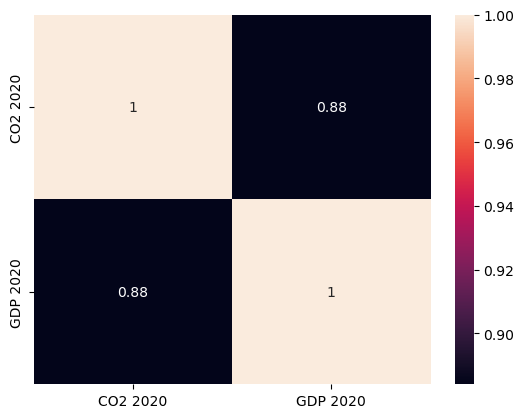

In [25]:
# Mapa de calor CO2 vs GDP 2020

sns.heatmap(CO2_GDP_2020.corr(),annot=True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()

### ¿Qué países concentran la mayor cantidad de emisiones de CO2?

In [31]:
# dejando solo paises

co2_2020_countries = co2_2020.drop(co2_2020.index[217:])

In [33]:
co2_2020_countries = co2_2020_countries.reset_index(drop=True)

In [35]:
co2_2020_countries = co2_2020_countries.sort_values('CO2 2020', ascending=False)

In [41]:
# Análisis descriptivo

co2_2020_countries['CO2 2020'].describe()

count        217.00
mean      148943.61
std       821874.44
min            0.00
25%          687.60
50%         8312.50
75%        46324.30
max     10944686.20
Name: CO2 2020, dtype: float64